In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
passenger_df = pd.read_csv('/Users/akshitakhajuria/Downloads/Air_Traffic_Passenger_Statistics.csv')
flights_df = pd.read_csv('/Users/akshitakhajuria/Downloads/flights_sample_3m.csv')

In [3]:
passenger_df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [4]:
passenger_df[passenger_df['Year']== 2016]

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
12403,12403,201603,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,7604,Enplaned,7604,2016,March
14637,14637,201601,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Deplaned,Other,International,G,4589,Deplaned,4589,2016,January
14638,14638,201601,Aer Lingus,EI,Aer Lingus,EI,International,Europe,Enplaned,Other,International,G,3801,Enplaned,3801,2016,January
14639,14639,201601,Aeromexico,AM,Aeromexico,AM,International,Mexico,Deplaned,Other,International,A,12444,Deplaned,12444,2016,January
14640,14640,201601,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,10399,Enplaned,10399,2016,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


### Air Traffic Passenger Statistics


1. Comprises of- A dataset detailing the number of passengers per airline per terminal, split by activity type (Enplaned, Deplaned, Transit), and associated with boarding areas, price categories, and regions.

2. Key Columns:

- Operating Airline: The carrier responsible for the flight.

- Terminal: Terminal number where passengers boarded or deplaned.

- Passenger Count: Number of passengers (can use Adjusted Passenger Count for more accuracy).

- Activity Type Code: Whether passengers were boarding (enplaned), arriving (deplaned), or transiting.

- Year, Month: Time dimension.

Limitation:
The dataset only includes data up to 2017, so we'll use this as a baseline to estimate passenger load per airline and terminal, assuming traffic patterns by airline remain relatively stable into 2019–2023. We’ll map this data to the flight dataset using the airline name or IATA code.

In [5]:
flights_df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


### Flight Delay and Cancellation Data (2019–2023)

1. Consists of- A detailed flight-level dataset including information on departure/arrival times, delays, cancellations, and causes of delay.

2. Key Columns:

- FL_DATE: Flight date (used to create time series).

- AIRLINE: Airline name (will need to match with Operating Airline).

- ORIGIN, DEST: Airport codes.

- ARR_DELAY: Arrival delay in minutes.

- CANCELLED: Whether the flight was canceled.

- DELAY_DUE_*: Delay attribution (weather, carrier, late aircraft, etc.)

Strength:
This data will be used to understand delay patterns and estimate when and where congestion might occur due to delays.



### Next Step- Data Cleaning 


1. Passenger Load Estimation- From passenger_df, compute average passenger load per airline per terminal. Use this to estimate passengers per flight in flights_df.

2. Congestion Score Creation- Multiply estimated passengers per flight by delay duration to compute congestion scores by day or terminal.

3. Forecasting & Analysis- Use time-series models to forecast congestion. Optionally, cluster terminals based on load and delay.


In [6]:
# Step 1A: Select relevant columns
passenger_cleaned = passenger_df[[
    'Operating Airline', 'Terminal', 'Adjusted Passenger Count', 
    'Activity Type Code', 'Year'
]]

In [7]:
# Step 1B: Filter for 2016 only
passenger_cleaned = passenger_cleaned[passenger_cleaned['Year'] == 2016]


In [8]:
# Step 1C: Drop rows with missing values in key columns
passenger_cleaned.dropna(subset=['Operating Airline', 'Terminal', 'Adjusted Passenger Count'], inplace=True)


In [9]:
# Separate enplaned and deplaned records
enplaned = passenger_cleaned[passenger_cleaned['Activity Type Code'] == 'Enplaned']
deplaned = passenger_cleaned[passenger_cleaned['Activity Type Code'] == 'Deplaned']

# Group and aggregate passenger counts
enplaned_summary = enplaned.groupby(['Operating Airline', 'Terminal'])['Adjusted Passenger Count'].sum().reset_index()
enplaned_summary.rename(columns={'Adjusted Passenger Count': 'EnplanedPassengers'}, inplace=True)

deplaned_summary = deplaned.groupby(['Operating Airline', 'Terminal'])['Adjusted Passenger Count'].sum().reset_index()
deplaned_summary.rename(columns={'Adjusted Passenger Count': 'DeplanedPassengers'}, inplace=True)


In [10]:
# Merge enplaned and deplaned data
passenger_summary = pd.merge(
    enplaned_summary,
    deplaned_summary,
    how='outer',
    on=['Operating Airline', 'Terminal']
)

# Fill NaNs where one type is missing
passenger_summary.fillna(0, inplace=True)

# Add total passenger count column
passenger_summary['TotalPassengers'] = passenger_summary['EnplanedPassengers'] + passenger_summary['DeplanedPassengers']


In [11]:
# Preview the summary
passenger_summary.head()


,Operating Airline,Terminal,EnplanedPassengers,DeplanedPassengers,TotalPassengers
0,Aer Lingus,International,12293.0,13552,25845.0
1,Aeromexico,International,30462.0,32973,63435.0
2,Air Canada,International,80552.0,81604,162156.0
3,Air China,International,22460.0,25282,47742.0
4,Air France,International,26616.0,27659,54275.0


 ### Step 2 – Clean and Prepare flights_df- Prepare it for mapping delays to estimated passenger volumes later.

In [12]:
# Select key columns
flights_df = flights_df[[
    'FL_DATE', 'AIRLINE', 'ORIGIN', 'DEST', 'DEP_DELAY', 'ARR_DELAY',
    'CANCELLED', 'CANCELLATION_CODE', 'ARR_TIME'
]]



In [13]:
# Convert to datetime
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'])

# Filter for 2019–2023
flights_df = flights_df[
    (flights_df['FL_DATE'].dt.year >= 2019) & 
    (flights_df['FL_DATE'].dt.year <= 2023)
]


In [14]:
# Remove rows where ARR_DELAY or AIRLINE is missing (essential for congestion modeling)
flights_df.dropna(subset=['AIRLINE', 'ARR_DELAY'], inplace=True)

# Replace negative or null delays with 0 (if you want to treat early flights as no delay)
flights_df['ARR_DELAY'] = flights_df['ARR_DELAY'].apply(lambda x: x if x > 0 else 0)


In [15]:
# Final preview
print(flights_df.shape)
flights_df.head()


(2913802, 9)


,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,ARR_TIME
0,2019-01-09,United Air Lines Inc.,FLL,EWR,-4.0,0.0,0.0,NaN,1447.0
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,-6.0,0.0,0.0,NaN,2310.0
2,2022-07-22,United Air Lines Inc.,DEN,MSP,6.0,0.0,0.0,NaN,1252.0
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,-1.0,24.0,0.0,NaN,1853.0
4,2020-02-23,Spirit Air Lines,MCO,DFW,-2.0,0.0,0.0,NaN,2040.0


In [16]:
flights_df['AIRLINE'].value_counts().head(10)


AIRLINE
Southwest Airlines Co.    555869
Delta Air Lines Inc.      388475
American Airlines Inc.    371218
SkyWest Airlines Inc.     334986
United Air Lines Inc.     248270
Republic Airline          138147
Envoy Air                 117312
Endeavor Air Inc.         109848
JetBlue Airways           109447
PSA Airlines Inc.         103483
Name: count, dtype: int64

### Step 3 – Estimate Passenger Load per Flight

In [17]:
# Use total passengers per airline from 2016
avg_passengers_per_airline_2016 = passenger_summary.groupby('Operating Airline')['TotalPassengers'].mean().to_dict()


In [18]:
# Manual mapping dictionary (update this as needed based on preview)
airline_name_map = {
    'United Air Lines Inc.': 'United Airlines',
    'Delta Air Lines Inc.': 'Delta Air Lines',
    'American Airlines Inc.': 'American Airlines',
    'JetBlue Airways': 'JetBlue Airways',
    'Southwest Airlines Co.': 'Southwest Airlines',
    'Spirit Air Lines': 'Spirit Airlines',
    # Add more mappings as needed
}

# Apply mapping to match 2016 names
flights_df['Mapped_Airline'] = flights_df['AIRLINE'].map(airline_name_map)


In [19]:
# Map estimated passengers from 2016 baseline
flights_df['EstimatedPassengers_2016'] = flights_df['Mapped_Airline'].map(avg_passengers_per_airline_2016)

# Fill missing with median if needed
median_est = flights_df['EstimatedPassengers_2016'].median()
flights_df['EstimatedPassengers_2016'].fillna(median_est, inplace=True)


In [20]:
# Add Year column
flights_df['Year'] = flights_df['FL_DATE'].dt.year

# Apply growth factor: Assume 5% yearly growth from 2016
growth_rate = 0.05
flights_df['GrowthFactor'] = (1 + growth_rate) ** (flights_df['Year'] - 2016)

# Adjust passengers for each flight
flights_df['AdjustedPassengers'] = flights_df['EstimatedPassengers_2016'] * flights_df['GrowthFactor']


In [21]:
flights_df[['AIRLINE', 'Mapped_Airline', 'EstimatedPassengers_2016', 'Year', 'GrowthFactor', 'AdjustedPassengers']].head()


,AIRLINE,Mapped_Airline,EstimatedPassengers_2016,Year,GrowthFactor,AdjustedPassengers
0,United Air Lines Inc.,United Airlines,2009523.5,2019,1.157625,2.326275e+06
1,Delta Air Lines Inc.,Delta Air Lines,772495.0,2022,1.340096,1.035217e+06
2,United Air Lines Inc.,United Airlines,2009523.5,2022,1.340096,2.692954e+06
3,Delta Air Lines Inc.,Delta Air Lines,772495.0,2023,1.407100,1.086978e+06
4,Spirit Air Lines,Spirit Airlines,780105.0,2020,1.215506,9.482225e+05


### Step 4 – Calculate the Congestion Score

In [22]:
# Ensure no negative or missing delays
flights_df['ARR_DELAY'] = flights_df['ARR_DELAY'].apply(lambda x: x if x > 0 else 0)

# Step 4: Compute Congestion Score
flights_df['CongestionScore'] = flights_df['AdjustedPassengers'] * flights_df['ARR_DELAY']


In [23]:
flights_df[['AIRLINE', 'AdjustedPassengers', 'ARR_DELAY', 'CongestionScore']].head()


,AIRLINE,AdjustedPassengers,ARR_DELAY,CongestionScore
0,United Air Lines Inc.,2.326275e+06,0.0,0.000000e+00
1,Delta Air Lines Inc.,1.035217e+06,0.0,0.000000e+00
2,United Air Lines Inc.,2.692954e+06,0.0,0.000000e+00
3,Delta Air Lines Inc.,1.086978e+06,24.0,2.608747e+07
4,Spirit Air Lines,9.482225e+05,0.0,0.000000e+00


### Step 5 – Aggregate Daily Congestion and Visualize Trends

We want to understand when airports face the highest congestion — daily patterns that can be used to:

- Forecast staffing needs

- Plan terminal resource allocation

- Highlight seasonal or event-driven spikes

In [24]:
#Step 5A: Aggregate Congestion Score by Date

# Group by date and sum congestion score
daily_congestion = flights_df.groupby('FL_DATE')['CongestionScore'].sum().reset_index()

# Rename for clarity
daily_congestion.rename(columns={'CongestionScore': 'TotalDailyCongestion'}, inplace=True)


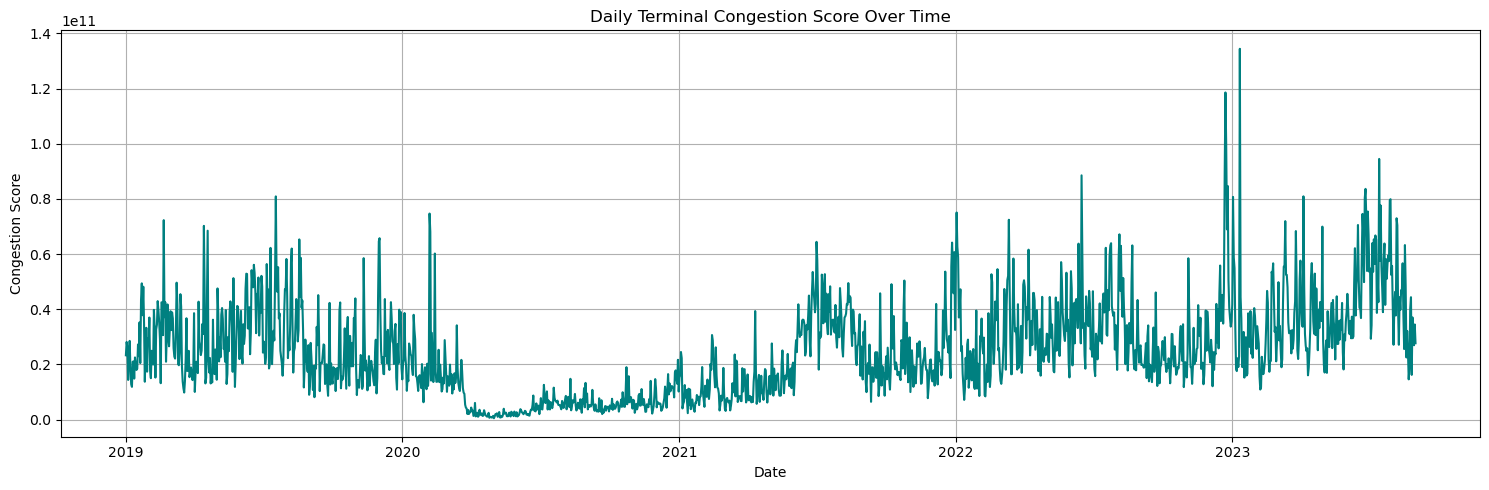

In [25]:
#Step 5B: Plot the Time Series

import matplotlib.pyplot as plt

# Convert date to datetime (if not already)
daily_congestion['FL_DATE'] = pd.to_datetime(daily_congestion['FL_DATE'])

# Sort by date
daily_congestion.sort_values('FL_DATE', inplace=True)

# Plot
plt.figure(figsize=(15, 5))
plt.plot(daily_congestion['FL_DATE'], daily_congestion['TotalDailyCongestion'], color='teal')
plt.title("Daily Terminal Congestion Score Over Time")
plt.xlabel("Date")
plt.ylabel("Congestion Score")
plt.grid(True)
plt.tight_layout()
plt.show()


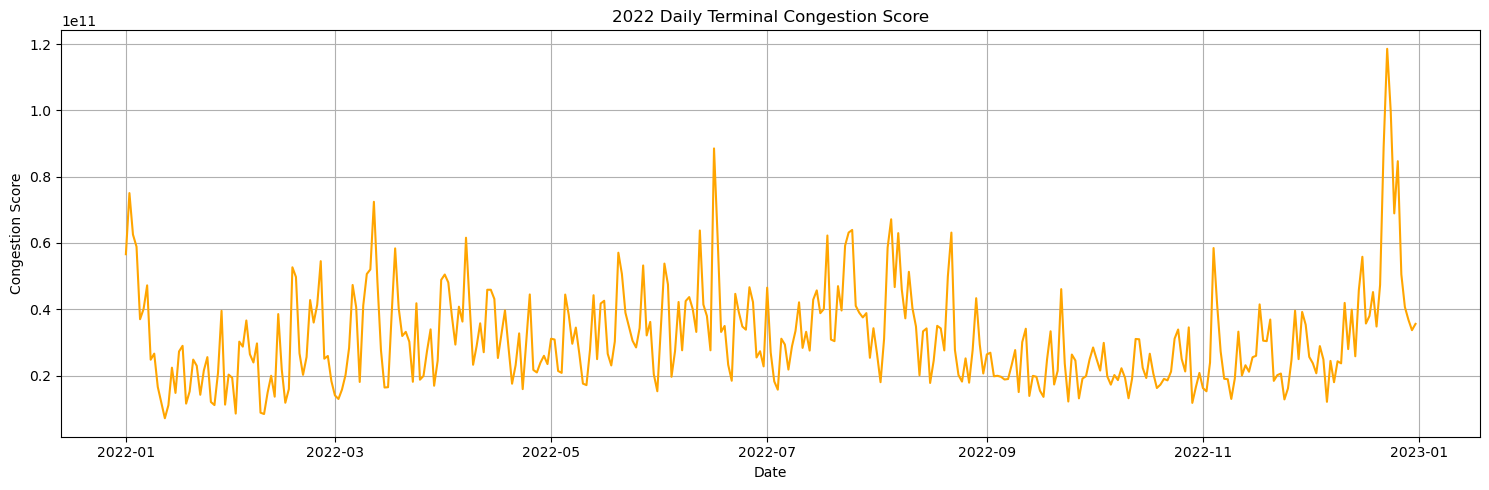

In [26]:
# Example: Filter for 2022
congestion_2022 = daily_congestion[daily_congestion['FL_DATE'].dt.year == 2022]

plt.figure(figsize=(15, 5))
plt.plot(congestion_2022['FL_DATE'], congestion_2022['TotalDailyCongestion'], color='orange')
plt.title("2022 Daily Terminal Congestion Score")
plt.xlabel("Date")
plt.ylabel("Congestion Score")
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 6 – Forecast Future Congestion Using ARIMA

Use a time series model to forecast congestion levels based on historical trends.
Even if LA28 is a one-time event, this helps simulate:

- What future traffic might look like

- When stress levels could peak again

- How far in advance planning should begin

ARIMA is ideal for time series that:

- Have a consistent frequency (daily)

- May include seasonality or trend

- Don’t need external regressors (for now)

In [27]:
#Step 6A: Import Model and Prepare Data


from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Set date as index
congestion_2022.set_index('FL_DATE', inplace=True)

# Optional: Resample to fill any missing dates
congestion_2022 = congestion_2022.asfreq('D')


In [28]:
#Step 6B: Fit ARIMA Model

# Fit SARIMAX model (basic seasonal model)
model = SARIMAX(
    congestion_2022['TotalDailyCongestion'],
    order=(1,1,1),           # ARIMA(p,d,q)
    seasonal_order=(1,1,1,7) # Weekly seasonality (7-day cycles)
)
results = model.fit()


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41562D+01    |proj g|=  5.80098D-02

At iterate    5    f=  2.41198D+01    |proj g|=  7.19303D-03

At iterate   10    f=  2.41173D+01    |proj g|=  1.98975D-04

At iterate   15    f=  2.41173D+01    |proj g|=  2.05250D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   3.321D-05   2.412D+01
  F =   24.117328646546390     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [29]:
# Forecast 30 days ahead
forecast = results.get_forecast(steps=30)
forecast_df = forecast.predicted_mean.reset_index()
forecast_df.columns = ['FL_DATE', 'ForecastedCongestion']


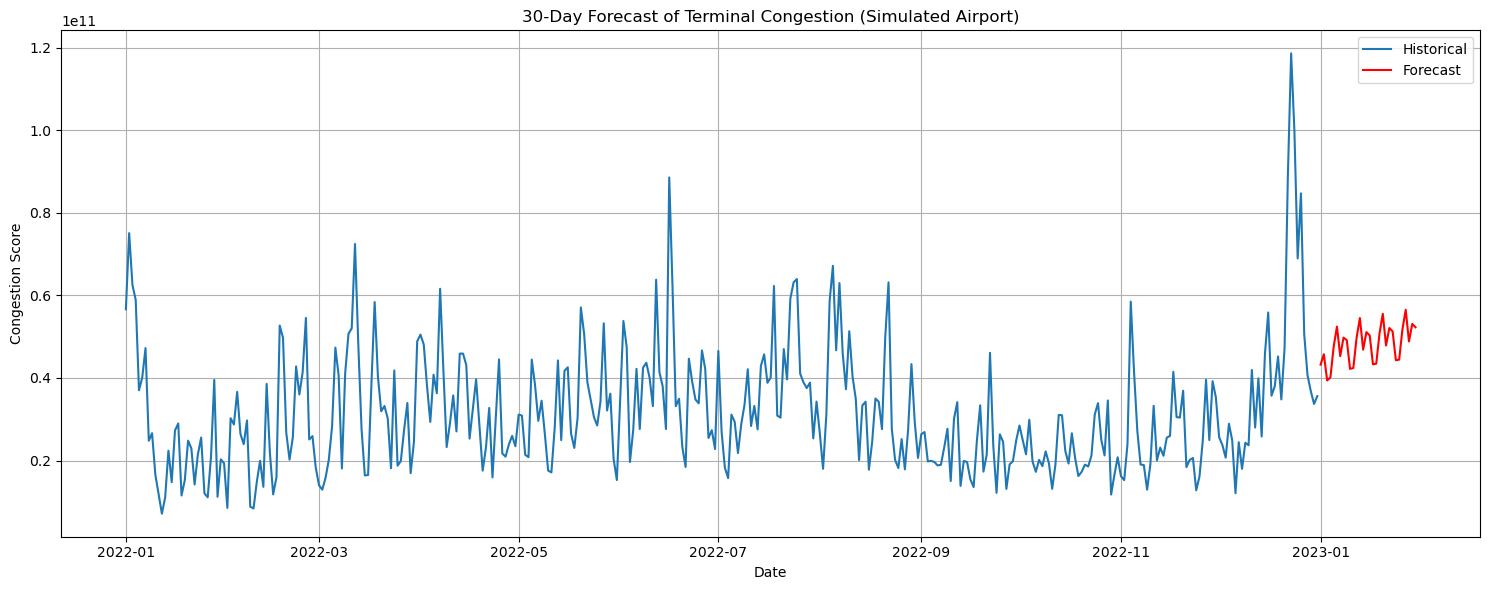

In [30]:
# Plot actual + forecast
plt.figure(figsize=(15, 6))
plt.plot(congestion_2022.index, congestion_2022['TotalDailyCongestion'], label='Historical')
plt.plot(forecast_df['FL_DATE'], forecast_df['ForecastedCongestion'], label='Forecast', color='red')
plt.title("30-Day Forecast of Terminal Congestion (Simulated Airport)")
plt.xlabel("Date")
plt.ylabel("Congestion Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
#Which airlines or terminals contribute most to congestion?

flights_df.groupby('Mapped_Airline')['CongestionScore'].sum().sort_values(ascending=False).head(10)


Mapped_Airline
United Airlines       9.318094e+12
Southwest Airlines    6.136723e+12
Delta Air Lines       4.142349e+12
American Airlines     3.834040e+12
JetBlue Airways       2.421844e+12
Spirit Airlines       1.543243e+12
Name: CongestionScore, dtype: float64

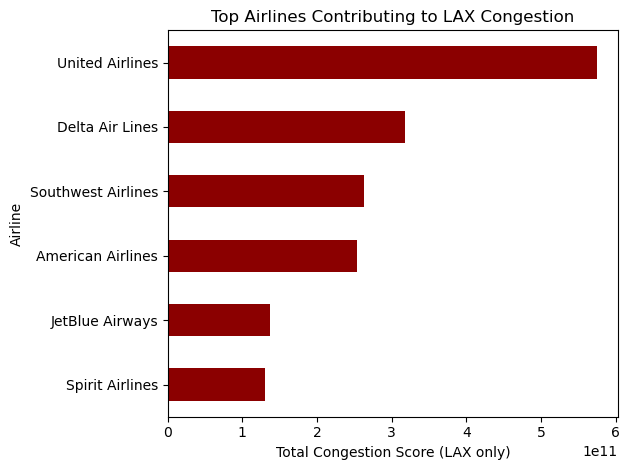

In [138]:
# Filter for flights where LAX is either origin or destination
lax_flights = flights_df[(flights_df['ORIGIN'] == 'LAX') | (flights_df['DEST'] == 'LAX')]

# Group by airline and sum congestion score for LAX-specific flights
lax_congestion_by_airline = lax_flights.groupby('Mapped_Airline')['CongestionScore'].sum().sort_values(ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

lax_congestion_by_airline.plot(kind='barh', color='darkred')
plt.xlabel("Total Congestion Score (LAX only)")
plt.ylabel("Airline")
plt.title("Top Airlines Contributing to LAX Congestion")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


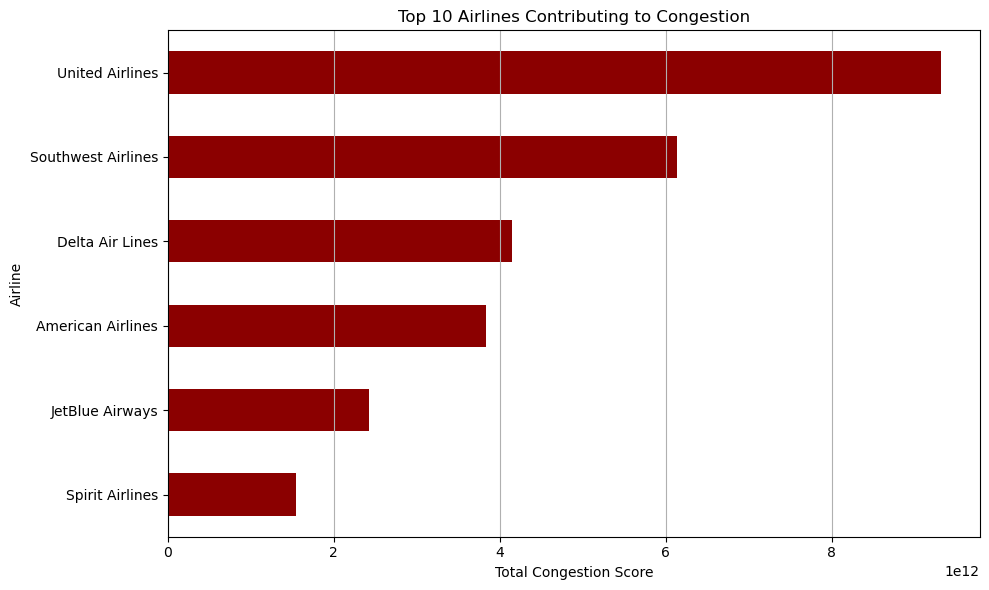

In [98]:
import matplotlib.pyplot as plt

# Create the summary
top_congestion = flights_df.groupby('Mapped_Airline')['CongestionScore'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_congestion.plot(kind='barh', color='darkred')
plt.title('Top 10 Airlines Contributing to Congestion')
plt.xlabel('Total Congestion Score')
plt.ylabel('Airline')
plt.gca().invert_yaxis()  # So highest value is at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [57]:
#What are the most congested dates of the year?

daily_congestion.sort_values(by='TotalDailyCongestion', ascending=False).head(10)


,FL_DATE,TotalDailyCongestion
1471,2023-01-11,1.344126e+11
1452,2022-12-23,1.185843e+11
1453,2022-12-24,9.975223e+10
1655,2023-07-14,9.447797e+10
1451,2022-12-22,8.888711e+10
1262,2022-06-16,8.852946e+10
1455,2022-12-26,8.468427e+10
1637,2023-06-26,8.362748e+10
1555,2023-04-05,8.092303e+10
198,2019-07-18,8.090177e+10


<Axes: xlabel='Hour'>

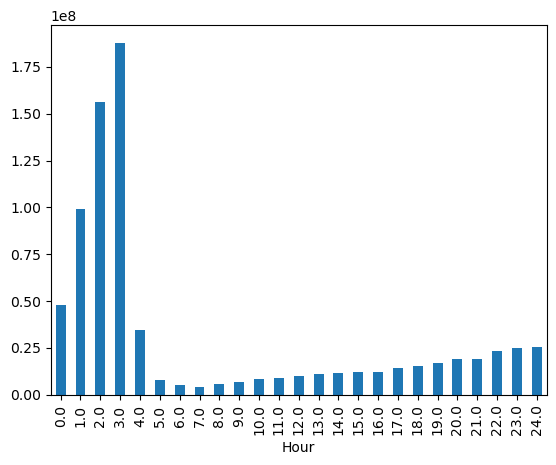

In [59]:
#Which times of day are worst for delays?

flights_df['Hour'] = flights_df['ARR_TIME'] // 100  # e.g., 1447 → 14
flights_df.groupby('Hour')['CongestionScore'].mean().plot(kind='bar')


In [64]:
flights_df['Hour'] = flights_df['ARR_TIME'] // 100


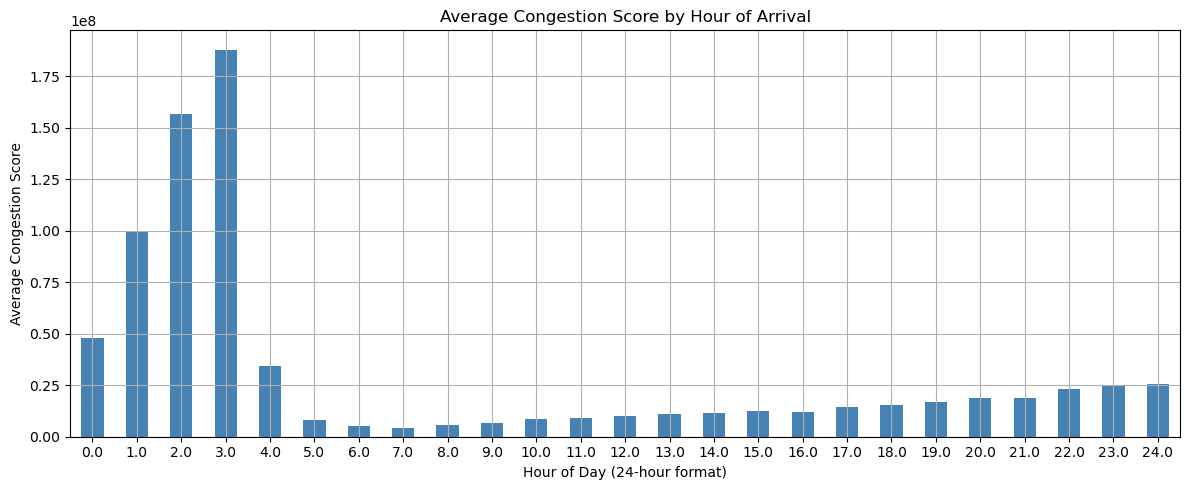

In [65]:
import matplotlib.pyplot as plt

hourly_congestion = flights_df.groupby('Hour')['CongestionScore'].mean()

plt.figure(figsize=(12,5))
hourly_congestion.plot(kind='bar', color='steelblue')
plt.title("Average Congestion Score by Hour of Arrival")
plt.xlabel("Hour of Day (24-hour format)")
plt.ylabel("Average Congestion Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
#Which airports are sending the most delayed passengers into LAX?

lax_inbound = flights_df[flights_df['DEST'] == 'LAX']
lax_inbound.groupby('ORIGIN')['CongestionScore'].sum().sort_values(ascending=False).head(10)


ORIGIN
EWR    7.979291e+10
DEN    7.568894e+10
SFO    7.242326e+10
ORD    6.356419e+10
LAS    6.353495e+10
JFK    5.702557e+10
IAH    5.389344e+10
HNL    4.139322e+10
SEA    3.447078e+10
DFW    3.175296e+10
Name: CongestionScore, dtype: float64

<Axes: title={'center': 'Monthly Congestion Risk'}, xlabel='Month'>

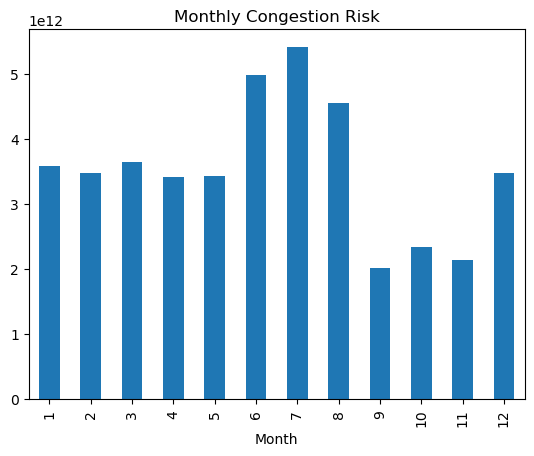

In [61]:
#Which months experience the highest congestion risk?

flights_df['Month'] = flights_df['FL_DATE'].dt.month
monthly_congestion = flights_df.groupby('Month')['CongestionScore'].sum()
monthly_congestion.plot(kind='bar', title='Monthly Congestion Risk')




In [62]:
#If a specific day had 2x traffic, what happens to terminal stress?

simulated = daily_congestion.copy()
simulated['Simulated_Olympic'] = simulated['TotalDailyCongestion'] * 2


## Presentation

<Axes: ylabel='Mapped_Airline'>

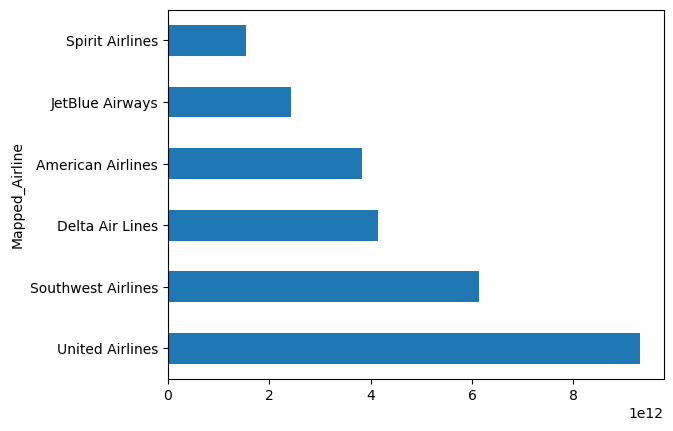

In [66]:
#Top 10 Airlines by Total Congestion Score

flights_df.groupby('Mapped_Airline')['CongestionScore'].sum().sort_values(ascending=False).head(10).plot(kind='barh')


In [56]:
# Sort by ARR_DELAY and show top 10 delayed flights
top_delayed_flights = flights_df.sort_values(by='ARR_DELAY', ascending=False).head(10)

# Display key flight info
top_delayed_flights[['FL_DATE', 'AIRLINE', 'ORIGIN', 'DEST', 'ARR_DELAY', 'DEP_DELAY', 'AdjustedPassengers']]


,FL_DATE,AIRLINE,ORIGIN,DEST,ARR_DELAY,DEP_DELAY,AdjustedPassengers
2639771,2022-03-26,American Airlines Inc.,DSM,CLT,2934.0,2966.0,674458.745114
2210421,2023-08-25,American Airlines Inc.,VPS,DFW,2913.0,2938.0,708181.682369
2606159,2023-07-11,American Airlines Inc.,TPA,PHL,2912.0,2905.0,708181.682369
2026734,2022-11-10,American Airlines Inc.,STL,ORD,2911.0,2903.0,674458.745114
2097337,2023-05-28,American Airlines Inc.,BFL,PHX,2900.0,2895.0,708181.682369
1899200,2023-05-31,American Airlines Inc.,MEM,CLT,2900.0,2884.0,708181.682369
518982,2023-08-17,American Airlines Inc.,MSN,DFW,2685.0,2690.0,708181.682369
1541563,2020-12-04,American Airlines Inc.,HNL,ORD,2568.0,2522.0,611753.963822
1383097,2021-11-11,American Airlines Inc.,BNA,MIA,2565.0,2574.0,642341.662013
1976065,2020-03-13,Endeavor Air Inc.,CLT,LGA,2560.0,2579.0,948222.503156


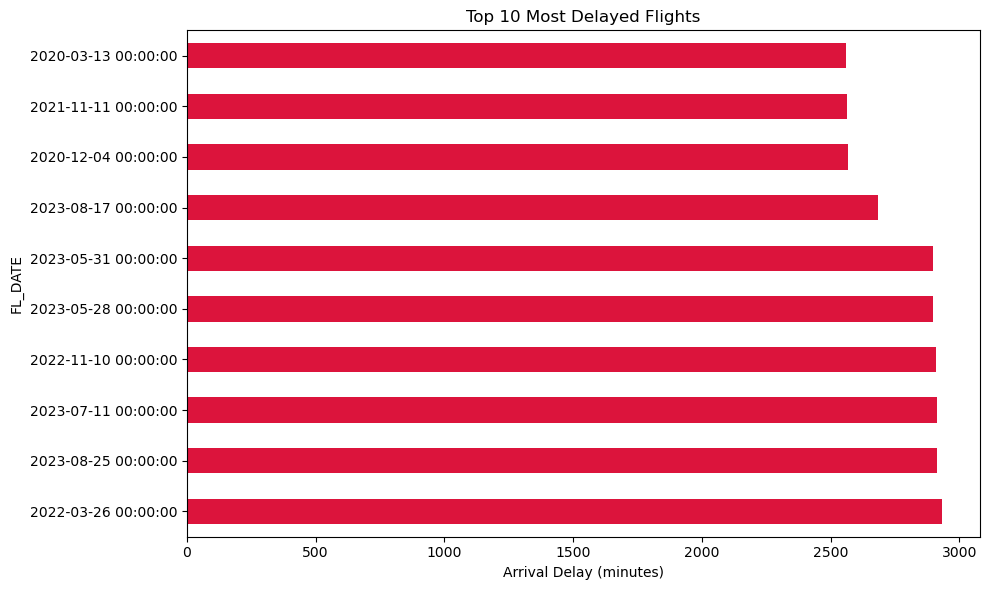

In [57]:
# Plot top 10 delayed flights
top_delayed_flights.set_index('FL_DATE')['ARR_DELAY'].plot(kind='barh', figsize=(10, 6), color='crimson')
plt.xlabel("Arrival Delay (minutes)")
plt.title("Top 10 Most Delayed Flights")
plt.tight_layout()
plt.show()


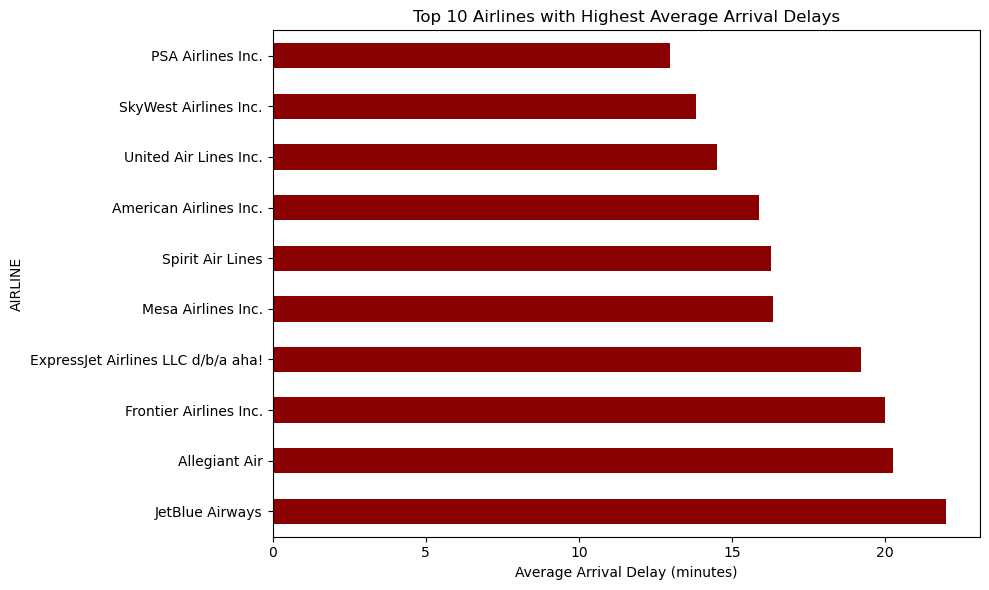

In [58]:
# Group by AIRLINE and calculate average arrival delay
avg_delay_by_airline = flights_df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values(ascending=False).head(10)

# Plot
avg_delay_by_airline.plot(kind='barh', color='darkred', figsize=(10, 6))
plt.xlabel("Average Arrival Delay (minutes)")
plt.title("Top 10 Airlines with Highest Average Arrival Delays")
plt.tight_layout()
plt.show()


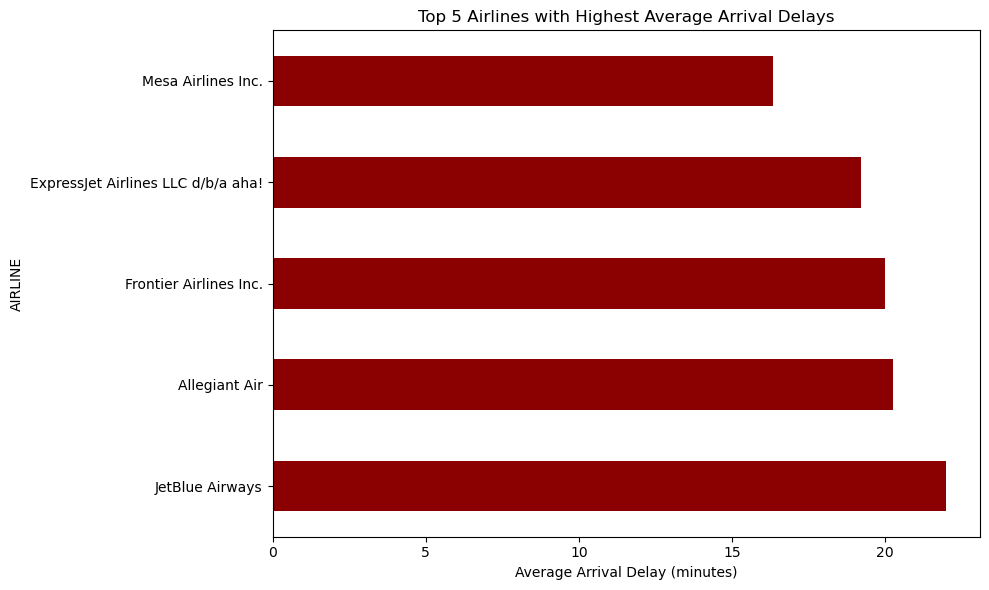

In [59]:
# Group by AIRLINE and calculate average arrival delay
avg_delay_by_airline = flights_df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values(ascending=False).head(5)

# Plot
avg_delay_by_airline.plot(kind='barh', color='darkred', figsize=(10, 6))
plt.xlabel("Average Arrival Delay (minutes)")
plt.title("Top 5 Airlines with Highest Average Arrival Delays")
plt.tight_layout()
plt.show()


In [67]:
#Top 10 Congestion Days

daily_congestion.sort_values('TotalDailyCongestion', ascending=False).head(10)


,FL_DATE,TotalDailyCongestion
1471,2023-01-11,1.344126e+11
1452,2022-12-23,1.185843e+11
1453,2022-12-24,9.975223e+10
1655,2023-07-14,9.447797e+10
1451,2022-12-22,8.888711e+10
1262,2022-06-16,8.852946e+10
1455,2022-12-26,8.468427e+10
1637,2023-06-26,8.362748e+10
1555,2023-04-05,8.092303e+10
198,2019-07-18,8.090177e+10


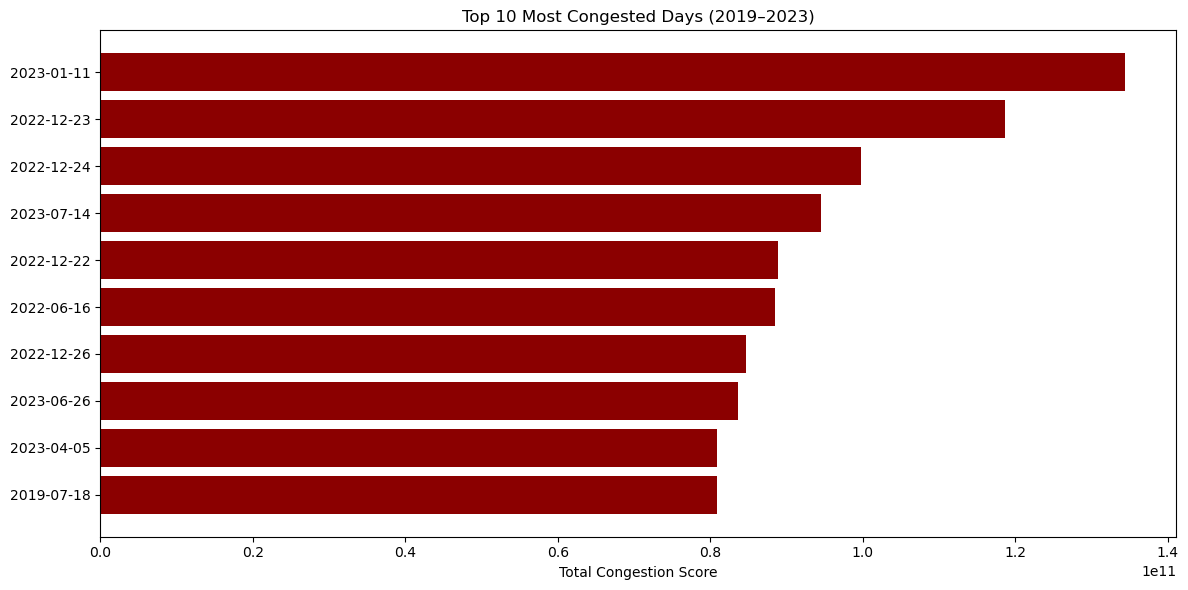

In [68]:
# Step 1: Sort and select top 10
top_10_days = daily_congestion.sort_values('TotalDailyCongestion', ascending=False).head(10)

# Step 2: Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(top_10_days['FL_DATE'].astype(str), top_10_days['TotalDailyCongestion'], color='darkred')
plt.xlabel('Total Congestion Score')
plt.title('Top 10 Most Congested Days (2019–2023)')
plt.gca().invert_yaxis()  # So the highest bar appears on top
plt.tight_layout()
plt.show()


<Axes: xlabel='Month'>

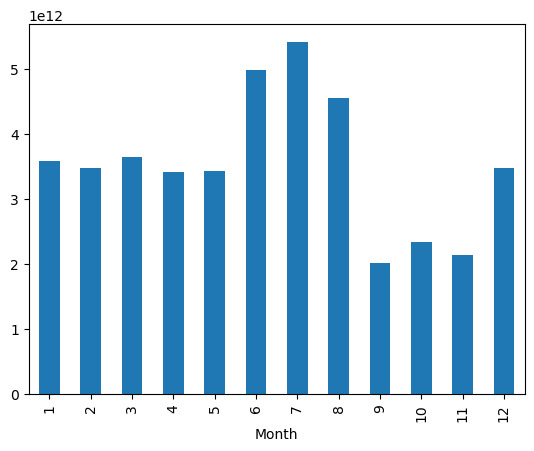

In [69]:
#Monthly/Seasonal Patterns

flights_df['Month'] = flights_df['FL_DATE'].dt.month
flights_df.groupby('Month')['CongestionScore'].sum().plot(kind='bar')


In [139]:
# Example: daily aggregation (can do monthly if preferred)
daily_congestion = flights_df.groupby('FL_DATE')['CongestionScore'].sum().reset_index()
daily_congestion = daily_congestion.sort_values('FL_DATE')

# Set FL_DATE as index for time series
daily_congestion.set_index('FL_DATE', inplace=True)


In [140]:
train_size = int(len(daily_congestion) * 0.8)
train, test = daily_congestion[:train_size], daily_congestion[train_size:]


In [141]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMA model
model = SARIMAX(train, order=(1,1,1))  # Adjust order as needed based on AIC/BIC
model_fit = model.fit(disp=False)


In [142]:
# Forecast for length of test set
forecast = model_fit.forecast(steps=len(test))

# Reset index for comparison
forecast.index = test.index


In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 15834197614.55
RMSE: 22640587114.48


In [145]:
mape = np.mean(np.abs((test.values - forecast.values) / test.values)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 35.98%


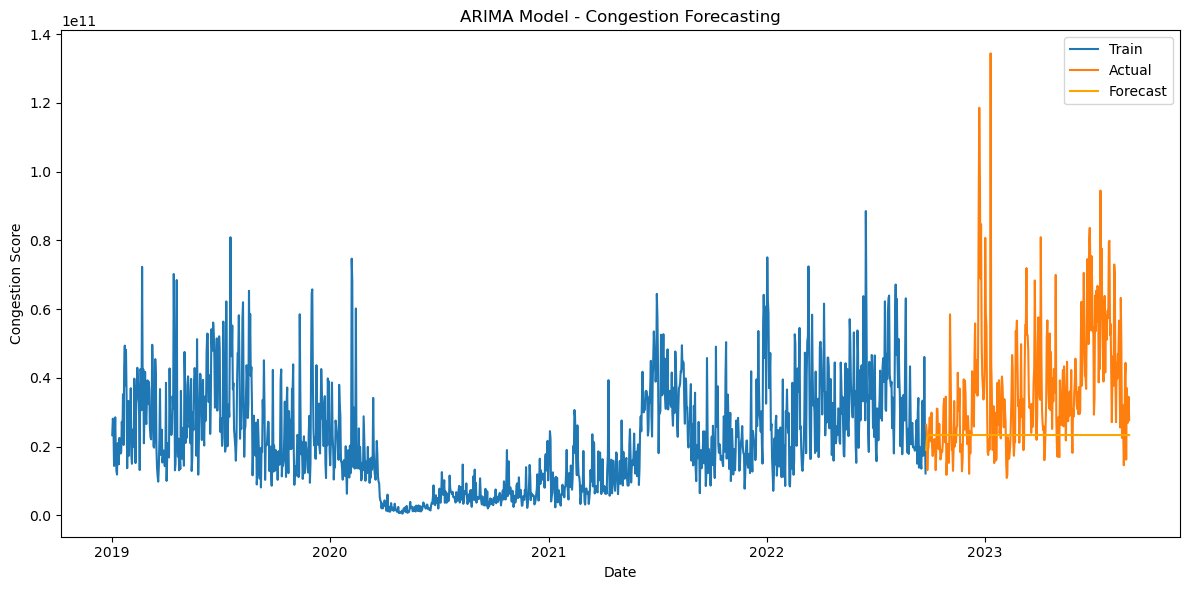

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.title('ARIMA Model - Congestion Forecasting')
plt.xlabel('Date')
plt.ylabel('Congestion Score')
plt.legend()
plt.tight_layout()
plt.show()


In [146]:
# Use only the last 1,000 days for faster training
X_sample = X.tail(1000)
y_sample = y.tail(1000)

# Train-test split
X_train, X_test = X_sample[:800], X_sample[800:]
y_train, y_test = y_sample[:800], y_sample[800:]


## Use Machine Learning to Predict Delays

#### "Can I predict if a flight will be significantly delayed using flight features?"

Predict whether ARR_DELAY > 15 minutes (industry standard threshold).

In [77]:
# Create binary target: 1 = delayed, 0 = on-time or early
flights_df['Delayed'] = flights_df['ARR_DELAY'].apply(lambda x: 1 if x > 15 else 0)



In [78]:
# Features we'll use to predict delays
features = ['DEP_DELAY', 'AIRLINE_ENC', 'ORIGIN_ENC', 'DEST_ENC', 'Hour', 'Month']


In [79]:
#Step 3: Prepare Data for Modeling

sample_df = flights_df.sample(n=100000, random_state=42)

X = sample_df[features]
y = sample_df['Delayed']


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [82]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16419
           1       0.90      0.71      0.79      3581

    accuracy                           0.93     20000
   macro avg       0.92      0.85      0.88     20000
weighted avg       0.93      0.93      0.93     20000



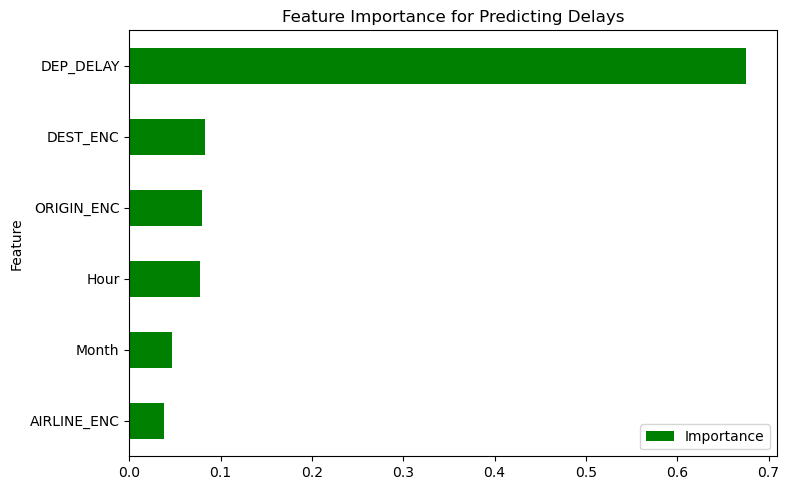

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Plot feature importances
feature_importance_df.sort_values('Importance').plot.barh(
    x='Feature', y='Importance', figsize=(8, 5), color='green'
)
plt.title('Feature Importance for Predicting Delays')
plt.tight_layout()
plt.show()


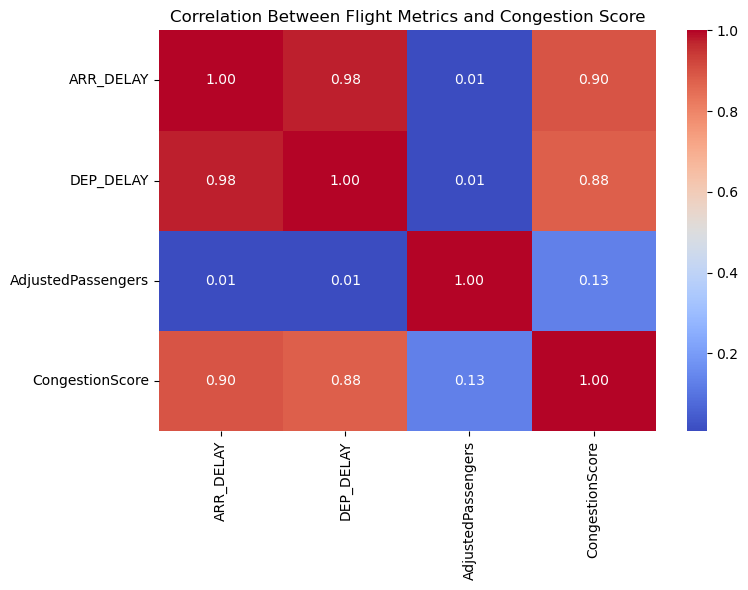

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_columns = ['ARR_DELAY', 'DEP_DELAY', 'AdjustedPassengers', 'CongestionScore']

# Compute correlation matrix
correlation_matrix = flights_df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Flight Metrics and Congestion Score")
plt.tight_layout()
plt.show()


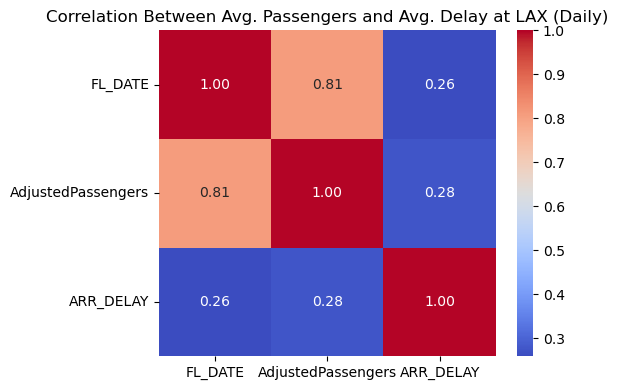

In [148]:
# Step 1: Filter only flights going to or from LAX
lax_df = flights_df[(flights_df['ORIGIN'] == 'LAX') | (flights_df['DEST'] == 'LAX')].copy()

# Step 2: Group by date to get daily averages
lax_daily = lax_df.groupby('FL_DATE').agg({
    'AdjustedPassengers': 'mean',   # or use 'sum' depending on question
    'ARR_DELAY': 'mean'
}).reset_index()

# Step 3: Compute correlation
correlation = lax_daily.corr()

# Step 4: Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Avg. Passengers and Avg. Delay at LAX (Daily)")
plt.tight_layout()
plt.show()


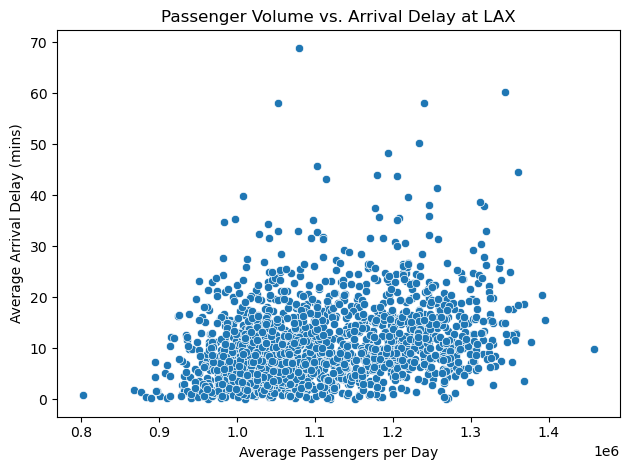

In [149]:
sns.scatterplot(data=lax_daily, x='AdjustedPassengers', y='ARR_DELAY')
plt.title('Passenger Volume vs. Arrival Delay at LAX')
plt.xlabel('Average Passengers per Day')
plt.ylabel('Average Arrival Delay (mins)')
plt.tight_layout()
plt.show()


In [152]:
# Recompute threshold on daily congestion, not full dataset
daily_congestion = flights_df.groupby('FL_DATE')['CongestionScore'].sum().reset_index()

threshold = daily_congestion['CongestionScore'].quantile(0.75)

daily_congestion['HighCongestion'] = daily_congestion['CongestionScore'].apply(lambda x: 1 if x > threshold else 0)


In [153]:
daily_agg = flights_df.groupby('FL_DATE').agg({
    'ARR_DELAY': 'mean',
    'AdjustedPassengers': 'mean'
}).reset_index()

# Merge congestion labels
merged_df = pd.merge(daily_agg, daily_congestion[['FL_DATE', 'HighCongestion']], on='FL_DATE')


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = merged_df[['ARR_DELAY', 'AdjustedPassengers']]
y = merged_df['HighCongestion']

# Confirm balance
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


HighCongestion
0    1278
1     426
Name: count, dtype: int64
Accuracy: 0.9266862170087976


In [155]:
import statsmodels.api as sm

# X = just delay (or both delay + passengers if you want)
X = merged_df[['ARR_DELAY']]
X = sm.add_constant(X)

# y = High Congestion Label
y = merged_df['HighCongestion']

# Logistic Regression using statsmodels to get coefficients
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.119815
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         HighCongestion   No. Observations:                 1704
Model:                          Logit   Df Residuals:                     1702
Method:                           MLE   Df Model:                            1
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                  0.7869
Time:                        12:00:18   Log-Likelihood:                -204.17
converged:                       True   LL-Null:                       -958.22
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.9801      1.098    -14.557      0.000     -18.132     -13.829
ARR_DELAY      0.9439      0

In [156]:
np.exp(logit_model.params)


const        1.148026e-07
ARR_DELAY    2.570021e+00
dtype: float64

In [122]:
# Convert continuous features into bins
flights_df['DelayCategory'] = pd.cut(flights_df['ARR_DELAY'], bins=[0, 15, 60, 300], labels=['LowDelay', 'ModerateDelay', 'HighDelay'])
flights_df['PassengerCategory'] = pd.cut(flights_df['AdjustedPassengers'], bins=[0, 100, 200, 300], labels=['LowPassengers', 'MediumPassengers', 'HighPassengers'])
flights_df['CongestionTag'] = flights_df['HighCongestion'].apply(lambda x: 'Congested' if x == 1 else 'NotCongested')


In [123]:
from mlxtend.preprocessing import TransactionEncoder

transactions = flights_df[['DelayCategory', 'PassengerCategory', 'AIRLINE', 'Hour', 'CongestionTag']].astype(str).values.tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_ary, columns=te.columns_)


In [124]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 3.1: Find frequent itemsets
frequent_itemsets = apriori(df_te, min_support=0.01, use_colnames=True)

# Step 3.2: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Filter for rules where RHS is 'Congested'
congestion_rules = rules[rules['consequents'].astype(str).str.contains("Congested")]


In [126]:
# Display top 10 rules
congestion_rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0.0),(NotCongested),0.019028,0.751208,0.014253,0.749026,0.997096,-4.150942e-05,0.991308,-0.002960
2,(10.0),(NotCongested),0.058698,0.751208,0.044037,0.750221,0.998686,-5.792422e-05,0.996049,-0.001395
4,(11.0),(NotCongested),0.060850,0.751208,0.045767,0.752122,1.001217,5.564863e-05,1.003689,0.001295
6,(12.0),(NotCongested),0.060264,0.751208,0.045417,0.753625,1.003218,1.456723e-04,1.009811,0.003413
8,(13.0),(NotCongested),0.059319,0.751208,0.044546,0.750950,0.999658,-1.526024e-05,0.998967,-0.000364
10,(14.0),(NotCongested),0.058393,0.751208,0.043865,0.751203,0.999994,-2.427799e-07,0.999983,-0.000006
12,(15.0),(NotCongested),0.058326,0.751208,0.043767,0.750381,0.998900,-4.820874e-05,0.996689,-0.001168
14,(16.0),(NotCongested),0.063092,0.751208,0.047433,0.751799,1.000788,3.732550e-05,1.002384,0.000840
16,(17.0),(NotCongested),0.059389,0.751208,0.044618,0.751279,1.000095,4.217287e-06,1.000286,0.000100
18,(18.0),(NotCongested),0.060032,0.751208,0.045099,0.751243,1.000048,2.154106e-06,1.000144,0.000051


In [127]:
# Sort by confidence and lift to find strongest patterns
congestion_rules.sort_values(by=['confidence', 'lift'], ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
177,"(American Airlines Inc., ModerateDelay)",(NotCongested),0.015696,0.751208,0.011839,0.754264,1.004068,0.000048,1.012436,0.004116
250,"(American Airlines Inc., ModerateDelay, nan)",(NotCongested),0.015696,0.751208,0.011839,0.754264,1.004068,0.000048,1.012436,0.004116
251,"(American Airlines Inc., ModerateDelay)","(NotCongested, nan)",0.015696,0.751208,0.011839,0.754264,1.004068,0.000048,1.012436,0.004116
6,(12.0),(NotCongested),0.060264,0.751208,0.045417,0.753625,1.003218,0.000146,1.009811,0.003413
93,"(12.0, nan)",(NotCongested),0.060264,0.751208,0.045417,0.753625,1.003218,0.000146,1.009811,0.003413
94,(12.0),"(NotCongested, nan)",0.060264,0.751208,0.045417,0.753625,1.003218,0.000146,1.009811,0.003413
49,(Envoy Air),(NotCongested),0.040261,0.751208,0.030295,0.752464,1.001672,0.000051,1.005074,0.001739
200,"(Envoy Air, nan)",(NotCongested),0.040261,0.751208,0.030295,0.752464,1.001672,0.000051,1.005074,0.001739
201,(Envoy Air),"(NotCongested, nan)",0.040261,0.751208,0.030295,0.752464,1.001672,0.000051,1.005074,0.001739
68,(Spirit Air Lines),(NotCongested),0.031986,0.751208,0.024058,0.752157,1.001263,0.000030,1.003830,0.001304


## Clustering

In [84]:
#Can we segment flights into distinct behavioral clusters based on delay, passenger load, and timing?

#Step 1: Choose Clustering Features

cluster_features = ['DEP_DELAY', 'ARR_DELAY', 'AdjustedPassengers', 'Hour', 'Month']


In [85]:
#Step 2: Scale the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster = scaler.fit_transform(flights_df[cluster_features])


In [86]:
#Step 3: Apply KMeans Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
flights_df['Cluster'] = kmeans.fit_predict(X_cluster)


In [87]:
#Step 4: Analyze the Clusters

# Average values per cluster
flights_df.groupby('Cluster')[cluster_features].mean()


,DEP_DELAY,ARR_DELAY,AdjustedPassengers,Hour,Month
Cluster,,,,,
0,8.670757,11.524773,9.397922e+05,18.685359,6.249678
1,1.974598,5.880846,9.420754e+05,9.922333,6.292005
2,6.508748,9.967474,2.573751e+06,14.418202,6.289930
3,269.582934,268.017241,1.071192e+06,13.558301,6.207820


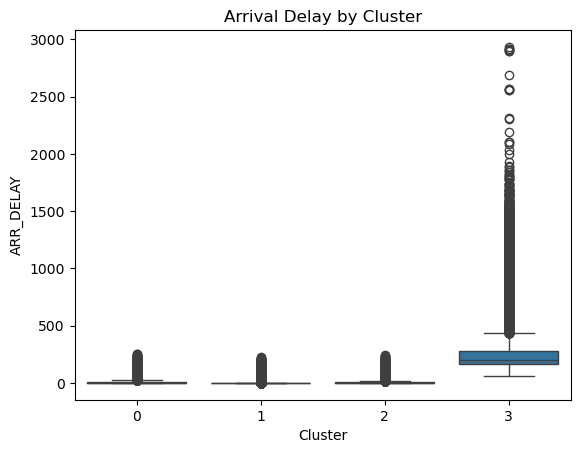

In [88]:
#Step 5: Visualize Clusters

#Boxplot of Delay by Cluster:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='ARR_DELAY', data=flights_df)
plt.title("Arrival Delay by Cluster")
plt.show()


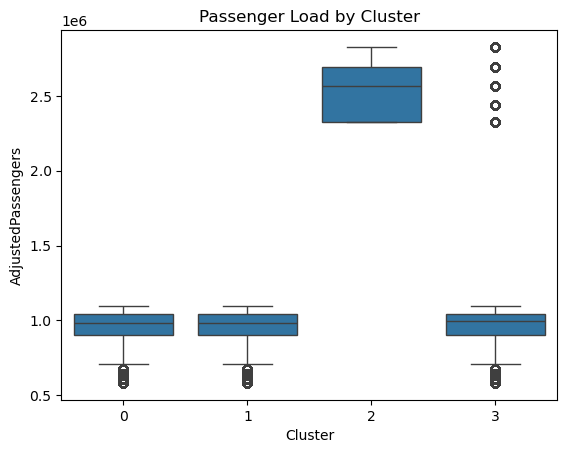

In [89]:
#Passenger Load by Cluster:

sns.boxplot(x='Cluster', y='AdjustedPassengers', data=flights_df)
plt.title("Passenger Load by Cluster")
plt.show()


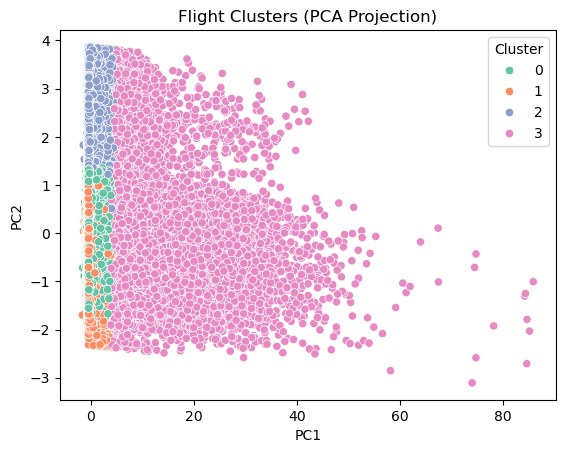

In [90]:
#Visualize with PCA (2D Plot)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

flights_df['PC1'] = X_pca[:, 0]
flights_df['PC2'] = X_pca[:, 1]

sns.scatterplot(data=flights_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Flight Clusters (PCA Projection)")
plt.show()


In [91]:
flights_df.groupby('Cluster')[['DEP_DELAY', 'ARR_DELAY', 'AdjustedPassengers', 'Hour', 'Month']].mean()


,DEP_DELAY,ARR_DELAY,AdjustedPassengers,Hour,Month
Cluster,,,,,
0,8.670757,11.524773,9.397922e+05,18.685359,6.249678
1,1.974598,5.880846,9.420754e+05,9.922333,6.292005
2,6.508748,9.967474,2.573751e+06,14.418202,6.289930
3,269.582934,268.017241,1.071192e+06,13.558301,6.207820


In [92]:
# Map cluster numbers to meaningful labels
cluster_labels = {
    0: "Evening Moderate Delay",
    1: "Morning Low Delay",
    2: "Afternoon High Volume",
    3: "Severe Delay Flights"
}

flights_df['Cluster_Label'] = flights_df['Cluster'].map(cluster_labels)


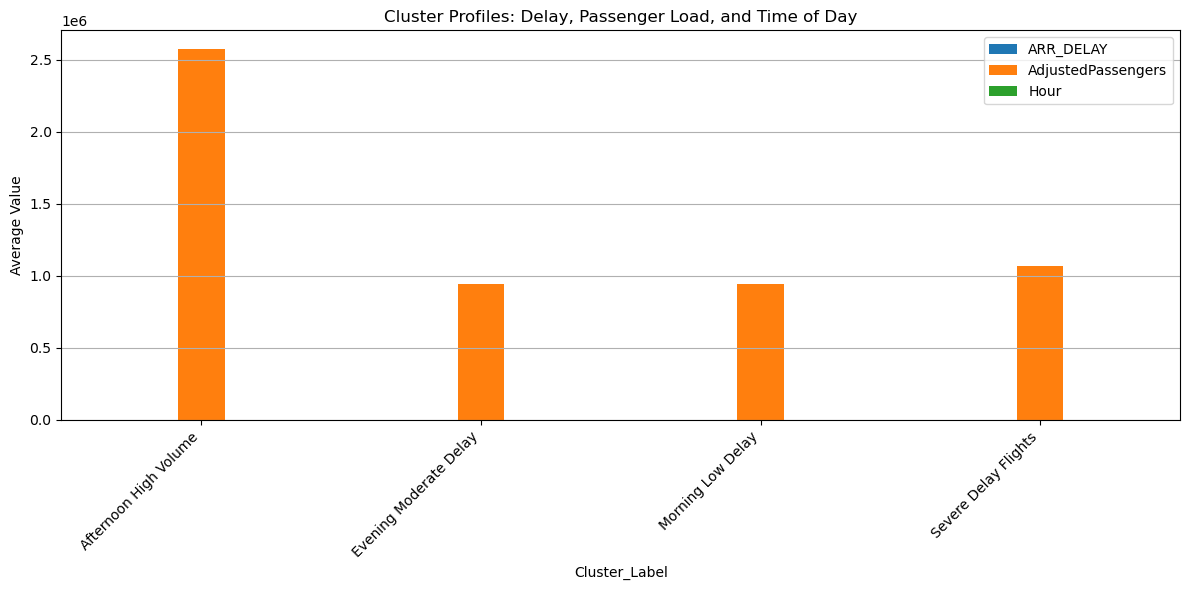

In [93]:
import matplotlib.pyplot as plt

# Recalculate the grouped means with labels
cluster_summary = flights_df.groupby('Cluster_Label')[['ARR_DELAY', 'AdjustedPassengers', 'Hour']].mean()

# Plot
cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title("Cluster Profiles: Delay, Passenger Load, and Time of Day")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [95]:
# Build cluster summary table
cluster_characteristics = flights_df.groupby('Cluster_Label')[['ARR_DELAY', 'DEP_DELAY', 'AdjustedPassengers', 'Hour']].mean().round(2)

# Rename columns for presentation
cluster_characteristics = cluster_characteristics.rename(columns={
    'ARR_DELAY': 'Avg Arrival Delay (min)',
    'DEP_DELAY': 'Avg Departure Delay (min)',
    'AdjustedPassengers': 'Avg Passenger Count',
    'Hour': 'Avg Time of Day (24h)'
})

# Reset index for clean display
cluster_characteristics.reset_index(inplace=True)

import pandas as pd
import IPython.display as display
display.display(cluster_characteristics)


,Cluster_Label,Avg Arrival Delay (min),Avg Departure Delay (min),Avg Passenger Count,Avg Time of Day (24h)
0,Afternoon High Volume,9.97,6.51,2573750.65,14.42
1,Evening Moderate Delay,11.52,8.67,939792.15,18.69
2,Morning Low Delay,5.88,1.97,942075.40,9.92
3,Severe Delay Flights,268.02,269.58,1071192.35,13.56


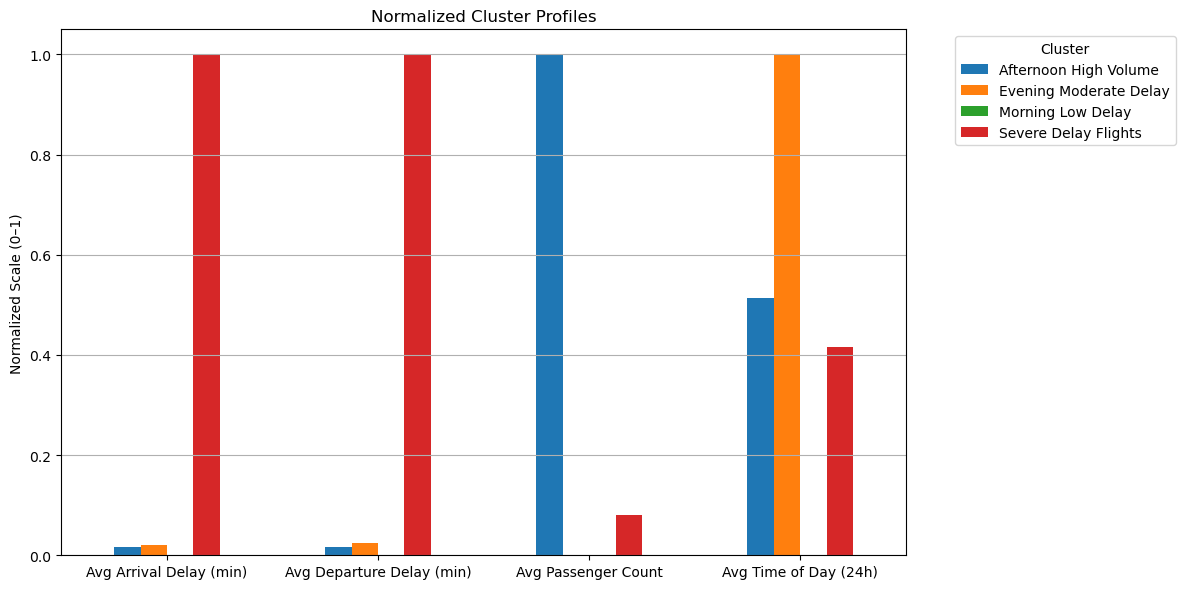

In [97]:
# Normalize the values for better comparison
normalized_summary = cluster_characteristics.copy()
cols_to_normalize = ['Avg Arrival Delay (min)', 'Avg Departure Delay (min)', 'Avg Passenger Count', 'Avg Time of Day (24h)']

# Normalize each column between 0 and 1
for col in cols_to_normalize:
    max_val = normalized_summary[col].max()
    min_val = normalized_summary[col].min()
    normalized_summary[col] = (normalized_summary[col] - min_val) / (max_val - min_val)

# Transpose and plot
normalized_summary.set_index('Cluster_Label').T.plot(kind='bar', figsize=(12, 6))

plt.title("Normalized Cluster Profiles")
plt.ylabel("Normalized Scale (0–1)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [157]:
passenger_df['Terminal'].unique()


array(['Terminal 1', 'International', 'Terminal 3', 'Other', 'Terminal 2'],
      dtype=object)

### Insights

1. High-Volume Flights Are Not Always the Most Delayed - 

Cluster: Afternoon High Volume

These flights have the highest average passenger load but only moderate delays.

They contribute significantly to congestion even without being the primary source of delay.
Insight: These flights represent space and crowding challenges, not delay risks. They require proactive planning for terminal capacity, staffing, and passenger services.


2. Morning Flights Offer Operational Stability

Cluster: Morning Low Delay

These flights operate with minimal delays and predictable passenger volumes.

They offer a relatively smooth operational window during the day.
Insight: This cluster is ideal for handling maintenance, staffing resets, and preparing for peak congestion later in the day.



3. Severely Delayed Flights Are Operational Red Flags

Cluster: Severe Delay Flights

These flights show extreme delays, both at departure and arrival, often over four hours.

While lower in passenger count than high-volume clusters, they present major disruption risks.
Insight: These flights require real-time monitoring and escalation protocols. Delay alerts, rerouting strategies, and contingency planning should be prioritized around this cluster.

In [118]:
threshold = flights_df['CongestionScore'].quantile(0.75)
flights_df['HighCongestion'] = flights_df['CongestionScore'].shift(-1).apply(lambda x: 1 if x > threshold else 0)


In [119]:
features = [
    'DEP_DELAY',             # How late flights are departing now
    'ARR_DELAY',             # Arrival delays up to this hour
    'AdjustedPassengers',    # Total passengers currently handled
    'AIRLINE_ENC',           # Airline (encoded)
    'Hour',                  # Hour of day
    'Month'                  # Month of year
]


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [ ]:
#Can we segment flights into distinct behavioral clusters based on delay, passenger load, and timing?

#Step 1: Choose Clustering Features

cluster_features = ['DEP_DELAY', 'ARR_DELAY', 'AdjustedPassengers', 'Hour', 'Month']

#Step 2: Scale the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster = scaler.fit_transform(flights_df[cluster_features])

#Step 3: Apply KMeans Clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
flights_df['Cluster'] = kmeans.fit_predict(X_cluster)

#Step 4: Analyze the Clusters

# Average values per cluster
flights_df.groupby('Cluster')[cluster_features].mean()

flights_df.groupby('Cluster')[['DEP_DELAY', 'ARR_DELAY', 'AdjustedPassengers', 'Hour', 'Month']].mean()

# Build cluster summary table
cluster_characteristics = flights_df.groupby('Cluster_Label')[['ARR_DELAY', 'DEP_DELAY', 'AdjustedPassengers', 'Hour']].mean().round(2)

# Rename columns for presentation
cluster_characteristics = cluster_characteristics.rename(columns={
    'ARR_DELAY': 'Avg Arrival Delay (min)',
    'DEP_DELAY': 'Avg Departure Delay (min)',
    'AdjustedPassengers': 'Avg Passenger Count',
    'Hour': 'Avg Time of Day (24h)'
})

# Reset index for clean display
cluster_characteristics.reset_index(inplace=True)

import pandas as pd
import IPython.display as display
display.display(cluster_characteristics)

# Normalize the values for better comparison
normalized_summary = cluster_characteristics.copy()
cols_to_normalize = ['Avg Arrival Delay (min)', 'Avg Departure Delay (min)', 'Avg Passenger Count', 'Avg Time of Day (24h)']

# Normalize each column between 0 and 1
for col in cols_to_normalize:
    max_val = normalized_summary[col].max()
    min_val = normalized_summary[col].min()
    normalized_summary[col] = (normalized_summary[col] - min_val) / (max_val - min_val)

# Transpose and plot
normalized_summary.set_index('Cluster_Label').T.plot(kind='bar', figsize=(12, 6))

plt.title("Normalized Cluster Profiles")
plt.ylabel("Normalized Scale (0–1)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [160]:
print(passenger_df.columns)


Index(['index', 'Activity Period', 'Operating Airline',
       'Operating Airline IATA Code', 'Published Airline',
       'Published Airline IATA Code', 'GEO Summary', 'GEO Region',
       'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')


In [161]:
# Clean both columns to avoid merge mismatches
flights_df['AIRLINE'] = flights_df['AIRLINE'].str.strip()
passenger_df['Operating Airline'] = passenger_df['Operating Airline'].str.strip()


In [ ]:
# Merge terminal information from passenger_df into flights_df
flights_with_terminal = flights_df.merge(
    passenger_df[['Operating Airline', 'Terminal']],
    how='left',
    left_on='AIRLINE',
    right_on='Operating Airline'
)


In [32]:
# Optional: Filter only Enplaned or Deplaned passengers (skip Thru/Transit)
lax_passenger = passenger_df[
    passenger_df['Adjusted Activity Type Code'].isin(['Enplaned', 'Deplaned'])
].copy()

# Optional: Further filter for Year >= 2019
lax_passenger = lax_passenger[lax_passenger['Year'] >= 2019]

# Drop duplicates to avoid redundant merge rows
lax_passenger = lax_passenger[['Operating Airline', 'Terminal']].drop_duplicates()


In [33]:
# Optional: filter flights_df to recent years (if 'FL_DATE' is datetime)
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'], errors='coerce')
flights_df_recent = flights_df[flights_df['FL_DATE'].dt.year >= 2019].copy()


In [34]:
# Clean airline names
flights_df_recent['AIRLINE'] = flights_df_recent['AIRLINE'].str.strip()
lax_passenger['Operating Airline'] = lax_passenger['Operating Airline'].str.strip()

# Merge
flights_with_terminal = flights_df_recent.merge(
    lax_passenger,
    how='left',
    left_on='AIRLINE',
    right_on='Operating Airline'
)


In [35]:
flights_with_terminal

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,ARR_TIME,Mapped_Airline,EstimatedPassengers_2016,Year,GrowthFactor,AdjustedPassengers,CongestionScore,Operating Airline,Terminal
0,2019-01-09,United Air Lines Inc.,FLL,EWR,-4.0,0.0,0.0,NaN,1447.0,United Airlines,2009523.5,2019,1.157625,2.326275e+06,0.000000e+00,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,-6.0,0.0,0.0,NaN,2310.0,Delta Air Lines,772495.0,2022,1.340096,1.035217e+06,0.000000e+00,NaN,NaN
2,2022-07-22,United Air Lines Inc.,DEN,MSP,6.0,0.0,0.0,NaN,1252.0,United Airlines,2009523.5,2022,1.340096,2.692954e+06,0.000000e+00,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,-1.0,24.0,0.0,NaN,1853.0,Delta Air Lines,772495.0,2023,1.407100,1.086978e+06,2.608747e+07,NaN,NaN
4,2020-02-23,Spirit Air Lines,MCO,DFW,-2.0,0.0,0.0,NaN,2040.0,Spirit Airlines,780105.0,2020,1.215506,9.482225e+05,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913797,2022-11-13,American Airlines Inc.,JAX,CLT,-2.0,0.0,0.0,NaN,1851.0,American Airlines,503291.5,2022,1.340096,6.744587e+05,0.000000e+00,NaN,NaN
2913798,2022-11-02,American Airlines Inc.,ORD,AUS,-6.0,0.0,0.0,NaN,1519.0,American Airlines,503291.5,2022,1.340096,6.744587e+05,0.000000e+00,NaN,NaN
2913799,2022-09-11,Delta Air Lines Inc.,HSV,ATL,41.0,36.0,0.0,NaN,805.0,Delta Air Lines,772495.0,2022,1.340096,1.035217e+06,3.726782e+07,NaN,NaN
2913800,2019-11-13,Republic Airline,BOS,LGA,-5.0,0.0,0.0,NaN,1712.0,NaN,780105.0,2019,1.157625,9.030691e+05,0.000000e+00,NaN,NaN


In [36]:
# Step 1: Filter flights that originate from or land at LAX
lax_only_flights = flights_df[(flights_df['ORIGIN'] == 'LAX') | (flights_df['DEST'] == 'LAX')].copy()


In [38]:
lax_only_flights.head()

,FL_DATE,AIRLINE,ORIGIN,DEST,DEP_DELAY,ARR_DELAY,CANCELLED,CANCELLATION_CODE,ARR_TIME,Mapped_Airline,EstimatedPassengers_2016,Year,GrowthFactor,AdjustedPassengers,CongestionScore
8,2023-02-12,Spirit Air Lines,IAH,LAX,-3.0,0.0,0.0,NaN,706.0,Spirit Airlines,780105.0,2023,1.407100,1.097686e+06,0.0
50,2020-01-06,Delta Air Lines Inc.,LAX,ATL,5.0,0.0,0.0,NaN,1728.0,Delta Air Lines,772495.0,2020,1.215506,9.389725e+05,0.0
58,2021-11-20,Alaska Airlines Inc.,SEA,LAX,1.0,0.0,0.0,NaN,1156.0,NaN,780105.0,2021,1.276282,9.956336e+05,0.0
83,2019-02-20,American Airlines Inc.,LAX,KOA,7.0,0.0,0.0,NaN,1201.0,American Airlines,503291.5,2019,1.157625,5.826228e+05,0.0
105,2022-10-14,American Airlines Inc.,ORD,LAX,10.0,0.0,0.0,NaN,2105.0,American Airlines,503291.5,2022,1.340096,6.744587e+05,0.0


In [39]:
# Clean airline names first
lax_only_flights['AIRLINE'] = lax_only_flights['AIRLINE'].str.strip()
passenger_df['Operating Airline'] = passenger_df['Operating Airline'].str.strip()

# Merge only LAX-relevant flights with LAX terminal info
flights_with_terminal = lax_only_flights.merge(
    passenger_df[['Operating Airline', 'Terminal']],
    how='left',
    left_on='AIRLINE',
    right_on='Operating Airline'
)


In [40]:
lax_terminals = ['Terminal 1', 'Terminal 2', 'Terminal 3', 'International']
lax_flights_df = flights_with_terminal[flights_with_terminal['Terminal'].isin(lax_terminals)].copy()


In [43]:
# Convert to datetime if not already
lax_flights_df['FL_DATE'] = pd.to_datetime(lax_flights_df['FL_DATE'], errors='coerce')

# Create Hour and Month columns
lax_flights_df['Hour'] = pd.to_datetime(lax_flights_df['ARR_TIME'], errors='coerce').dt.hour
lax_flights_df['Month'] = lax_flights_df['FL_DATE'].dt.month


         DEP_DELAY  ARR_DELAY  AdjustedPassengers  Hour  Month
Cluster                                                       
0           170.99     167.26          1028824.95   0.0   6.45
1             0.61       5.19           956717.57   0.0   3.97
2             7.37      10.91          1073769.95   0.0   4.41
3             4.56       8.93           990051.80   0.0   9.74


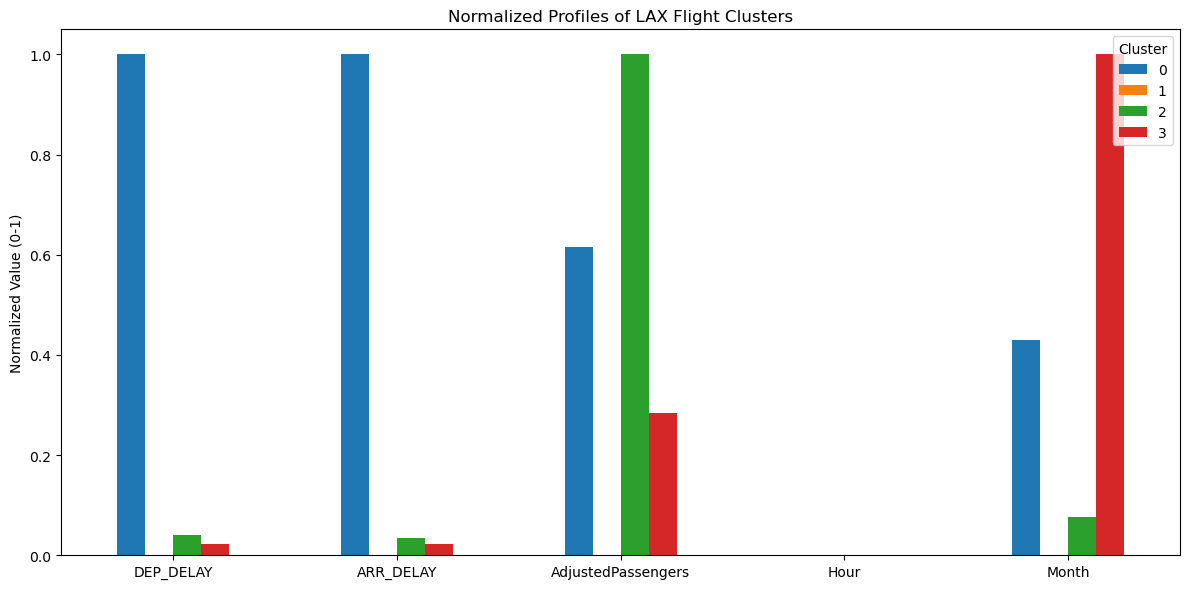

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Features for clustering
cluster_features = ['DEP_DELAY', 'ARR_DELAY', 'AdjustedPassengers', 'Hour', 'Month']

# Step 2: Drop NA values in clustering features
lax_flights_df_cleaned = lax_flights_df.dropna(subset=cluster_features).copy()

# Step 3: Scale
scaler = StandardScaler()
X_cluster = scaler.fit_transform(lax_flights_df_cleaned[cluster_features])

# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
lax_flights_df_cleaned['Cluster'] = kmeans.fit_predict(X_cluster)

# Step 5: Cluster summary
cluster_summary = lax_flights_df_cleaned.groupby('Cluster')[cluster_features].mean().round(2)
print(cluster_summary)

# Step 6: Optional – Visualize
cluster_summary_normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())
cluster_summary_normalized.T.plot(kind='bar', figsize=(12, 6))
plt.title("Normalized Profiles of LAX Flight Clusters")
plt.ylabel("Normalized Value (0-1)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [45]:
cluster_labels = {
    0: 'Severe Delay Flights',
    1: 'Morning Smooth Ops',
    2: 'High Volume Flights',
    3: 'Late-Year Delay Risk'
}


In [46]:
# Assign names to clusters
lax_flights_df_cleaned['Cluster_Label'] = lax_flights_df_cleaned['Cluster'].map(cluster_labels)


In [47]:
cluster_characteristics = lax_flights_df_cleaned.groupby('Cluster_Label')[cluster_features].mean().round(2).reset_index()


In [48]:
cluster_characteristics

,Cluster_Label,DEP_DELAY,ARR_DELAY,AdjustedPassengers,Hour,Month
0,High Volume Flights,7.37,10.91,1073769.95,0.0,4.41
1,Late-Year Delay Risk,4.56,8.93,990051.80,0.0,9.74
2,Morning Smooth Ops,0.61,5.19,956717.57,0.0,3.97
3,Severe Delay Flights,170.99,167.26,1028824.95,0.0,6.45


In [50]:
cluster_features = ['DEP_DELAY', 'ARR_DELAY', 'AdjustedPassengers', 'Hour']


In [51]:
lax_flights_df_cleaned = lax_flights_df.dropna(subset=cluster_features).copy()


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cluster = scaler.fit_transform(lax_flights_df_cleaned[cluster_features])


In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
lax_flights_df_cleaned['Cluster'] = kmeans.fit_predict(X_cluster)


In [54]:
cluster_summary = lax_flights_df_cleaned.groupby('Cluster')[cluster_features].mean().round(2)

# Rename clusters with more intuitive labels
cluster_labels = {
    0: 'High Delay Flights',
    1: 'Morning Smooth Ops',
    2: 'High Volume Predictable',
    3: 'Afternoon Moderate Delay'
}

# Map labels
lax_flights_df_cleaned['Cluster_Label'] = lax_flights_df_cleaned['Cluster'].map(cluster_labels)
